<a href="https://colab.research.google.com/github/Awiity/mswzadani/blob/main/uloha%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import sympy
import time
import pandas as pd
import seaborn as sns
from numpy import log
import scipy.linalg as la
from scipy.interpolate import lagrange

def divided_diff(x, y):
  n = len(y)
  coef = np.zeros([n, n])
  coef[:,0] = y
  for j in range(1,n):
      for i in range(n-j):
          coef[i][j] = \
         (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
  return coef

def newton_poly(coef, x_data, x):
  n = len(x_data) -1
  p = coef[n]
  for k in range(0,n+1):
      p = coef[n-k] + (x -x_data[n-k])*p
  return p

def lagrange_costum(x, y, xi, n):

  Ln = 0
  for i in range(n):
      li = y[i]
      for j in range(n):
          if j != i:
              li = li * (xi - x[j]) / (x[i] - x[j])
      Ln += li
  return Ln


NEWTON:
 [0.12023233 0.11977412 0.14100371 0.17802377 0.22602365 0.28113877
 0.34032232 0.4012286  0.46210722 0.52170778 0.57919415 0.63406805
 0.6861011  0.73527495 0.78172888 0.82571437 0.8675561  0.907619
 0.94628063 0.98390878 1.02084351 1.05738343 1.09377574 1.13020953
 1.16681223 1.20364851 1.24072157 1.27797636 1.31530436 1.35254981
 1.3895169  1.42597786 1.46168145 1.49636196 1.52974811 1.561572
 1.59157771 1.61952949 1.64521932 1.66847376 1.68915993 1.70719058
 1.7225281  1.73518743 1.74523778 1.75280323 1.75806207 1.7612449
 1.76263159 1.762547   1.76135561 1.75945505 1.75726867 1.75523716
 1.75380943 1.7534328  1.75454266 1.75755177 1.76283938 1.77074035
 1.78153443 1.79543608 1.81258482 1.8330366  1.85675636 1.88361203
 1.91337033 1.94569475 1.98014588 2.01618458 2.05317836 2.09041122
 2.12709754 2.1624003  2.19545411 2.22539349 2.25138691 2.27267701
 2.28862752 2.29877743 2.30290291 2.30108748 2.29380115 2.28198889
 2.26716923 2.25154347 2.23811619 2.23082769 2.23469901 2.

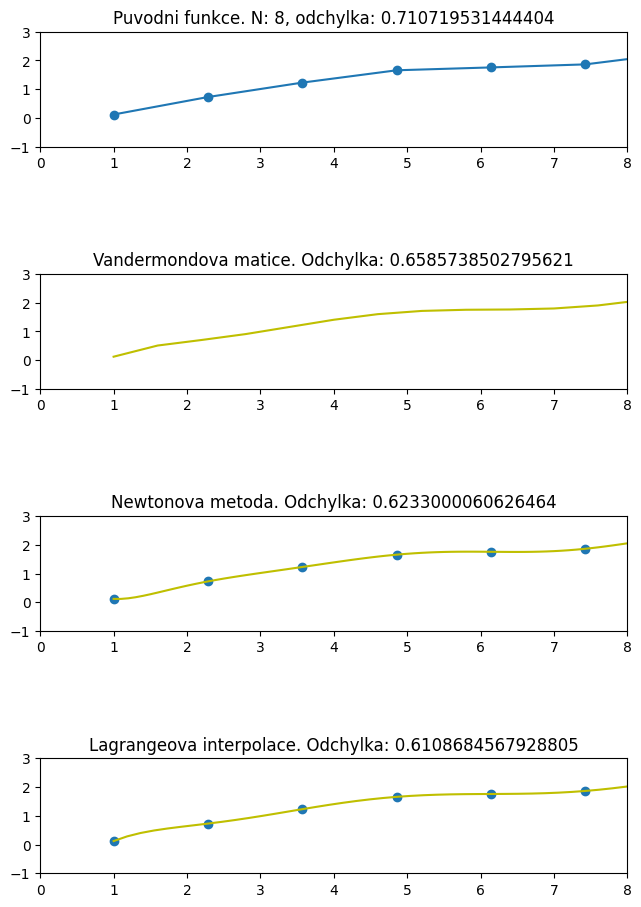

In [186]:
def f(x):
    return log(x)

t0 = time.time()
# start
N = 8
x = np.linspace(1, 10, N)
fx = np.random.normal(f(x), 0.1)
fig, axs = plt.subplots(4, sharex=False)
#puvodni
axs[0].plot(x,fx, 'o-')
axs[0].set_title(f"Puvodni funkce. N: {N}, odchylka: {np.std(fx)}")

X = np.vander(x, increasing=True)
a = la.solve(X, fx)
xs = np.linspace(1, 10, N*2)
ys = sum([a[k] * xs ** k for k in range(0, N)])
axs[1].plot(xs, ys, 'y')
axs[1].set_title(f"Vandermondova matice. Odchylka: {np.std(ys)}")


a_s = divided_diff(x, fx)[0, :]
x_new = np.arange(x[0], x[-1], .1)
fx_new = newton_poly(a_s, x, x_new)
print("NEWTON:\n",fx_new)
axs[2].plot(x,fx,'o', x_new, fx_new, 'y-')
axs[2].set_title(f"Newtonova metoda. Odchylka: {np.std(fx_new)}")


xphi = []
phi = []
ninterpol = N
for i in range(len(x) - 1):
  xinterpol = np.linspace(x[i], x[i+1], ninterpol)

  g = lagrange_costum(x, fx, xinterpol, ninterpol)
  xphi.extend(xinterpol)
  phi.extend(g)
print("LAGRANGE: \n",phi,"\n", xphi)
axs[3].plot(x,fx, 'o', xphi, phi, 'y-')
axs[3].set_title(f"Lagrangeova interpolace. Odchylka: {np.std(phi)}")



res = [ys, fx_new, phi]
print(f"Standartni odchylka PUVODNI FUNKCE: {np.std(fx)}")
print(f"Standartni odchylka Vandermondove funkce: {np.std(ys)}")
print(f"Standartni odchylka Newtonovy metody: {np.std(fx_new)}")
print(f"Standartni odchylka metody Lagrange: {np.std(phi)}")
# xlim ylim
for ax in axs:
    ax.set_xlim([0, N])
    ax.set_ylim([-1, 3])
# end
t1 = time.time()
print(f"TIME: {(t1 - t0) * 1000}ms")

fig.tight_layout()
fig.set_figheight(10)
plt.show()

NEWTON:
 [ 3.98097384  6.0897998   7.71909632  8.87239737  9.5956542   9.94964875
  9.99441954  9.78246046  9.35787151  8.75905797  8.02299284  7.18947505
  6.30423413  5.42014989  4.59627354  3.89475494  3.37619822  3.09438632
  3.09173279  3.39723721  4.02913855  5.00487868  6.36140638  8.18926993
 10.68436458]
LAGRANGE: 
 [3.9809738369433125, 5.248501319582636, 6.302985751163893, 7.177523292410539, 7.898798741924451, 8.48811057517341, 8.962295067530142, 9.33455420307895, 9.33455420307895, 9.615192070905438, 9.812264450585316, 9.932146288587873, 9.98002176731012, 9.960301668457067, 9.876972732484196, 9.73388371581771, 9.73388371581771, 9.534972847568406, 9.284441387454944, 8.986877986652228, 8.64733855328075, 8.271386324252596, 7.865096845189913, 7.435032560131601, 7.435032560131601, 6.988191712744027, 6.531936260751476, 6.073903505302161, 5.621906136985546, 5.183825400216725, 4.7675020777036625, 4.380629996713059, 4.380629996713059, 4.030656758850593, 3.7246963950713226, 3.469458647

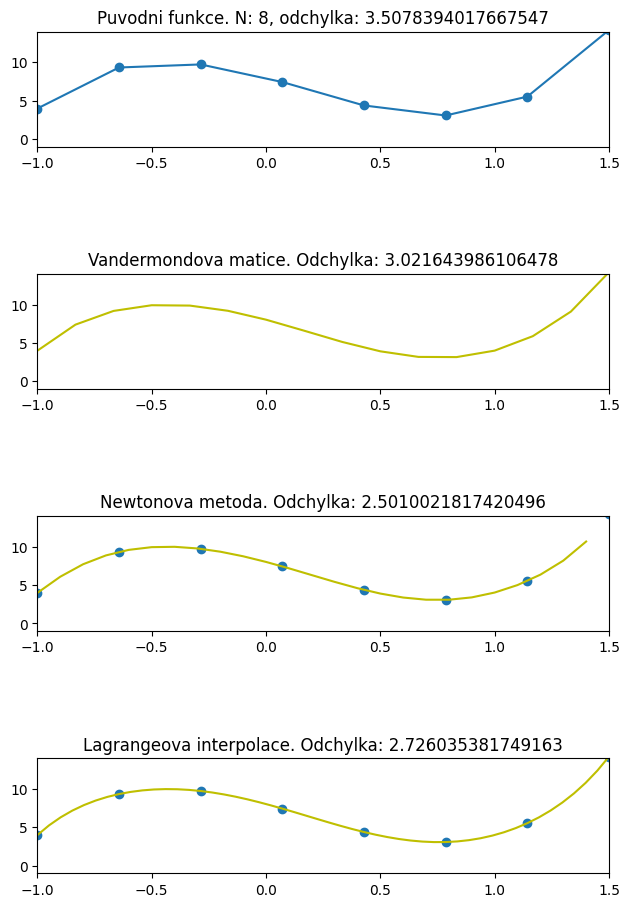

In [182]:
def f(x):
  return (2*x)**3 - (2*x)**2 - 8*x + 8




t0 = time.time()
# start
N = 8
x = np.linspace(-1, 1.5, N)
fx = np.random.normal(f(x), 0.1)
fig, axs = plt.subplots(4, sharex=False)
#puvodni
axs[0].plot(x,fx, 'o-')
axs[0].set_title(f"Puvodni funkce. N: {N}, odchylka: {np.std(fx)}")

X = np.vander(x, increasing=True)
a = la.solve(X, fx)
xs = np.linspace(-1, 1.5, N*2)
ys = sum([a[k] * xs ** k for k in range(0, N)])
axs[1].plot(xs, ys, 'y')
axs[1].set_title(f"Vandermondova matice. Odchylka: {np.std(ys)}")


a_s = divided_diff(x, fx)[0, :]
x_new = np.arange(x[0], x[-1], .1)
fx_new = newton_poly(a_s, x, x_new)
print("NEWTON:\n",fx_new)
axs[2].plot(x,fx,'o', x_new, fx_new, 'y-')
axs[2].set_title(f"Newtonova metoda. Odchylka: {np.std(fx_new)}")


xphi = []
phi = []
ninterpol = N
for i in range(len(x) - 1):
  xinterpol = np.linspace(x[i], x[i+1], ninterpol)

  g = lagrange_costum(x, fx, xinterpol, ninterpol)
  xphi.extend(xinterpol)
  phi.extend(g)
print("LAGRANGE: \n",phi,"\n", xphi)
axs[3].plot(x,fx, 'o', xphi, phi, 'y-')
axs[3].set_title(f"Lagrangeova interpolace. Odchylka: {np.std(phi)}")



res = [ys, fx_new, phi]
print(f"Standartni odchylka PUVODNI FUNKCE: {np.std(fx)}")
print(f"Standartni odchylka Vandermondove funkce: {np.std(ys)}")
print(f"Standartni odchylka Newtonovy metody: {np.std(fx_new)}")
print(f"Standartni odchylka metody Lagrange: {np.std(phi)}")

# end
t1 = time.time()
print(f"TIME: {(t1 - t0) * 1000}ms")
for ax in axs:
    ax.set_xlim([-1, 1.5])
    ax.set_ylim([-1, 14])
fig.tight_layout()
fig.set_figheight(10)
plt.show()

NEWTON:
 [ 0.29598705  0.23611925  0.16017017  0.07227173 -0.0238602  -0.12490309
 -0.22790566 -0.33026656 -0.42971362 -0.52428389 -0.61230421 -0.69237245
 -0.76333944 -0.82429141 -0.87453304 -0.91357117 -0.94109901 -0.9569809
 -0.9612377  -0.95403262 -0.93565765 -0.90652046 -0.86713186 -0.81809369
 -0.76008728 -0.69386229 -0.62022614 -0.54003379 -0.45417806 -0.36358036
 -0.26918184 -0.17193505 -0.07279594  0.02728368  0.12736324  0.22652015
  0.32385609  0.41850295  0.50962831  0.5964406   0.67819381  0.75419187
  0.82379261  0.88641137  0.94152422  0.98867082  1.02745688  1.05755634
  1.07871302  1.09074211  1.0935311   1.08704052  1.07130415  1.04642899
  1.01259482  0.9700534   0.91912727  0.86020823  0.79375544  0.7202931
  0.64040782  0.55474558  0.46400832  0.36895008  0.2703729   0.16912214
  0.06608157 -0.03783205 -0.14167474 -0.24448155 -0.3452731  -0.44306272
 -0.53686386 -0.62569803 -0.70860315 -0.78464238 -0.85291337 -0.912558
 -0.96277261 -1.00281869 -1.03203405 -1.049844

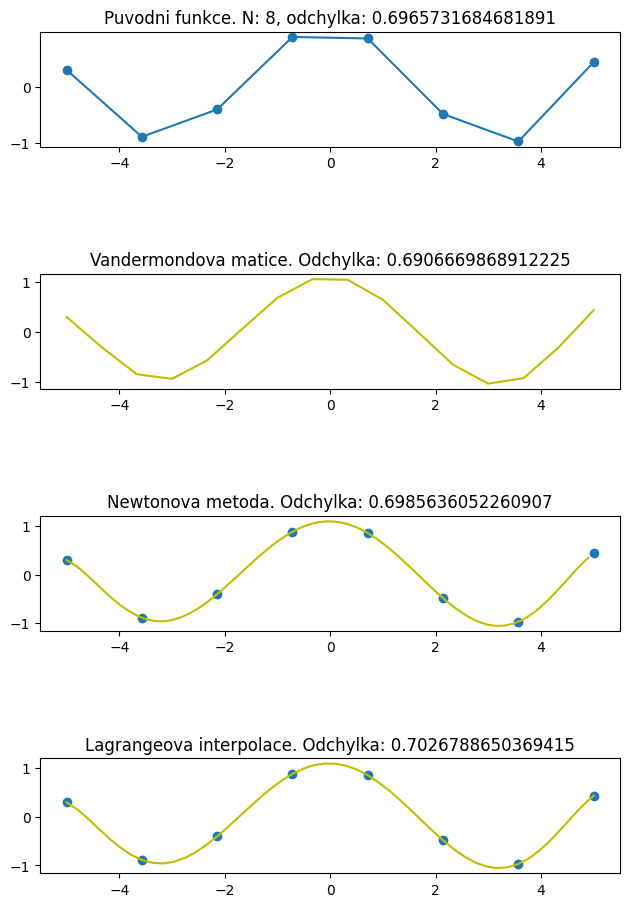

In [178]:
def f(x):
  return np.cos(x)

t0 = time.time()
# start
N = 8
x = np.linspace(-5, 5, N)
fx = np.random.normal(f(x), 0.1)
fig, axs = plt.subplots(4, sharex=False)
#puvodni
axs[0].plot(x,fx, 'o-')
axs[0].set_title(f"Puvodni funkce. N: {N}, odchylka: {np.std(fx)}")

X = np.vander(x, increasing=True)
a = la.solve(X, fx)
xs = np.linspace(-5, 5, N*2)
ys = sum([a[k] * xs ** k for k in range(0, N)])
axs[1].plot(xs, ys, 'y')
axs[1].set_title(f"Vandermondova matice. Odchylka: {np.std(ys)}")


a_s = divided_diff(x, fx)[0, :]
x_new = np.arange(x[0], x[-1], .1)
fx_new = newton_poly(a_s, x, x_new)
print("NEWTON:\n",fx_new)
axs[2].plot(x,fx,'o', x_new, fx_new, 'y-')
axs[2].set_title(f"Newtonova metoda. Odchylka: {np.std(fx_new)}")


xphi = []
phi = []
ninterpol = N
for i in range(len(x) - 1):
  xinterpol = np.linspace(x[i], x[i+1], ninterpol)

  g = lagrange_costum(x, fx, xinterpol, ninterpol)
  xphi.extend(xinterpol)
  phi.extend(g)
print("LAGRANGE: \n",phi,"\n", xphi)
axs[3].plot(x,fx, 'o', xphi, phi, 'y-')
axs[3].set_title(f"Lagrangeova interpolace. Odchylka: {np.std(phi)}")



res = [ys, fx_new, phi]
print(f"Standartni odchylka PUVODNI FUNKCE: {np.std(fx)}")
print(f"Standartni odchylka Vandermondove funkce: {np.std(ys)}")
print(f"Standartni odchylka Newtonovy metody: {np.std(fx_new)}")
print(f"Standartni odchylka metody Lagrange: {np.std(phi)}")
# end
t1 = time.time()
print(f"TIME: {(t1 - t0) * 1000}ms")
#
fig.tight_layout()
fig.set_figheight(10)
plt.show()